In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
url = "https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt"
data = pd.read_csv(url, index_col='Unnamed: 0')
print(data.head(), '\n')
print(data.info(), '\n')
print(data.describe(), '\n')

       Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom  Price
1  1177.698      2           7        2            2         2  62000
2  2134.800      5           7        4            2         2  78000
3  1138.560      5           7        2            2         1  58000
4  1458.780      2           7        3            2         2  45000
5   967.776     11          14        3            2         2  45000 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 1 to 648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 40.3 KB
None 

              Sqft       Floor  TotalF

In [3]:
data = data.drop(['Sqft', 'Floor', 'TotalFloor'], axis = 1)
print(data.head())

   Bedroom  Living.Room  Bathroom  Price
1        2            2         2  62000
2        4            2         2  78000
3        2            2         1  58000
4        3            2         2  45000
5        3            2         2  45000


In [4]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled

array([[-8.28956338e-01,  4.02693633e-01,  2.76918224e-01,
         3.70055758e-04],
       [ 1.15132825e+00,  4.02693633e-01,  2.76918224e-01,
         4.49714146e-01],
       [-8.28956338e-01,  4.02693633e-01, -1.18711665e+00,
        -1.11965967e-01],
       ...,
       [-1.81909863e+00, -1.76178464e+00, -1.18711665e+00,
        -4.77058040e-01],
       [ 1.61185955e-01,  4.02693633e-01,  2.76918224e-01,
         8.46220726e-02],
       [ 1.61185955e-01,  4.02693633e-01, -1.18711665e+00,
        -7.29814091e-01]])

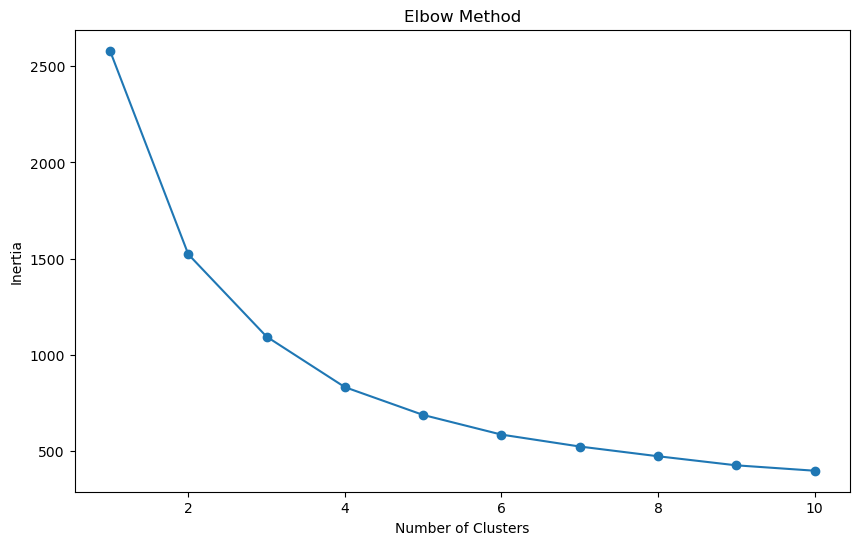

In [5]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [6]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=0)
data['cluster'] = kmeans.fit_predict(data_scaled)
print(data.head(10))

    Bedroom  Living.Room  Bathroom   Price  cluster
1         2            2         2   62000        2
2         4            2         2   78000        1
3         2            2         1   58000        2
4         3            2         2   45000        1
5         3            2         2   45000        1
6         4            2         2  148000        3
7         3            2         1   58000        2
8         1            0         1   48000        0
9         3            2         2   45000        1
10        4            2         2   65000        1


In [7]:
data.to_csv('clustered_data.csv', index=False)